In [ ]:
import cv2
import numpy as np
import pandas as pd
#from keras.utils import np_utils # This line caused the error
from tensorflow.keras.utils import to_categorical # Use this import instead
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [1]:
data_root = "../content/Untitled Folder/archive/A_Z Handwritten Data.csv"

In [ ]:
dataset = pd.read_csv(data_root).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)

In [ ]:
dataset = pd.read_csv(data_root).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)


In [ ]:
letter_x = dataset.drop("label", axis=1)
letter_y = dataset["label"]
(digit_train_x, digit_train_y), (digit_test_x, digit_test_y) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
letter_x = letter_x.values

In [ ]:
print(letter_x.shape, letter_y.shape)
print(digit_train_x.shape, digit_train_y.shape)
print(digit_test_x.shape, digit_test_y.shape)

(372450, 784) (372450,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
digit_data = np.concatenate((digit_train_x, digit_test_x))
digit_target = np.concatenate((digit_train_y, digit_test_y))

print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [ ]:
digit_target += 26

In [ ]:
data = []

for flatten in letter_x:
  image = np.reshape(flatten, (28, 28, 1))
  data.append(image)

letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [ ]:

digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))


In [ ]:
print(letter_data.shape, letter_target.shape)
print(digit_data.shape, digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


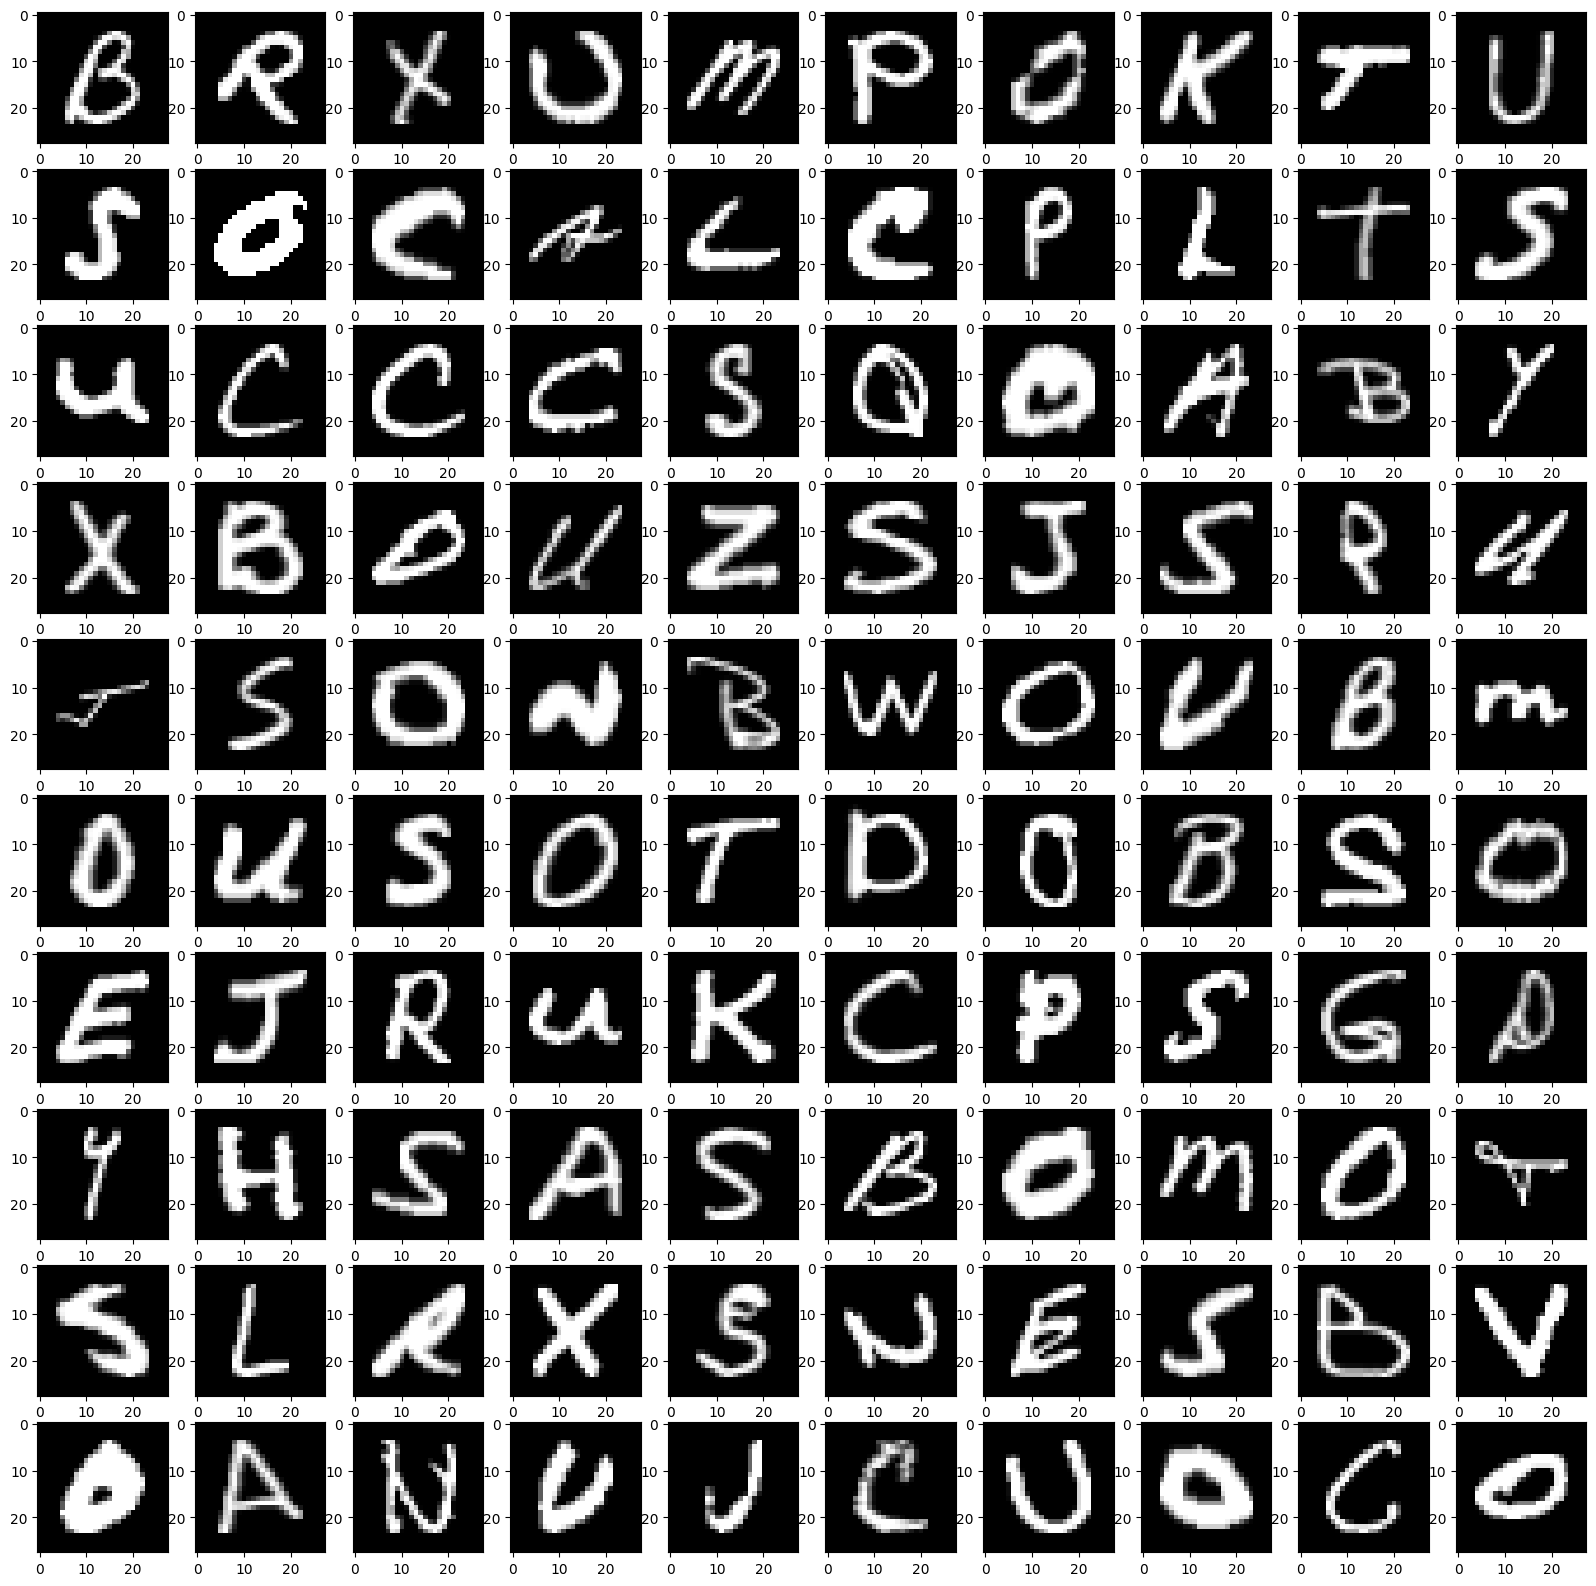

In [ ]:
shuffled_data = shuffle(letter_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

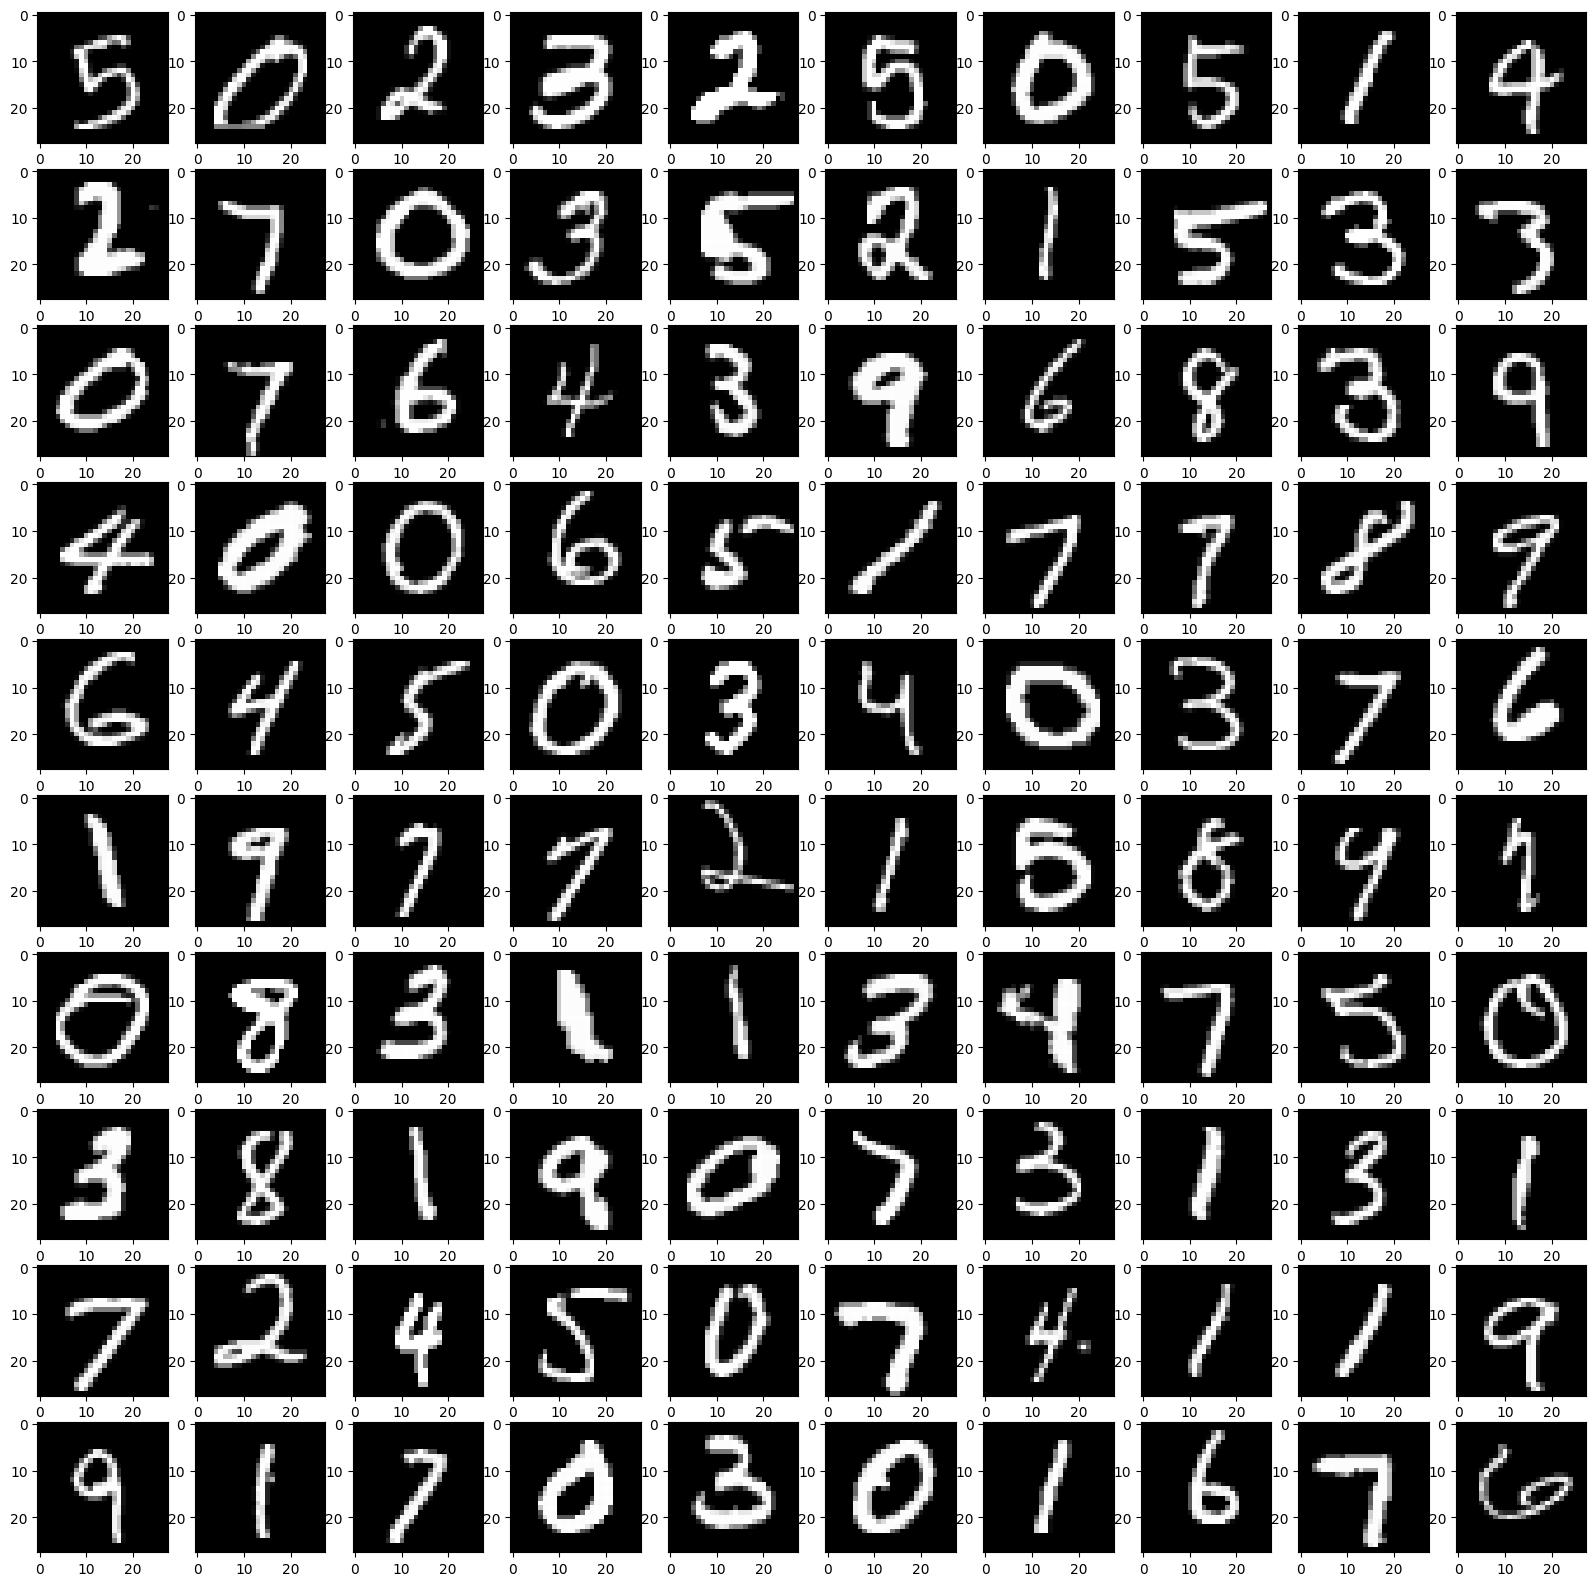

In [ ]:
shuffled_data = shuffle(digit_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

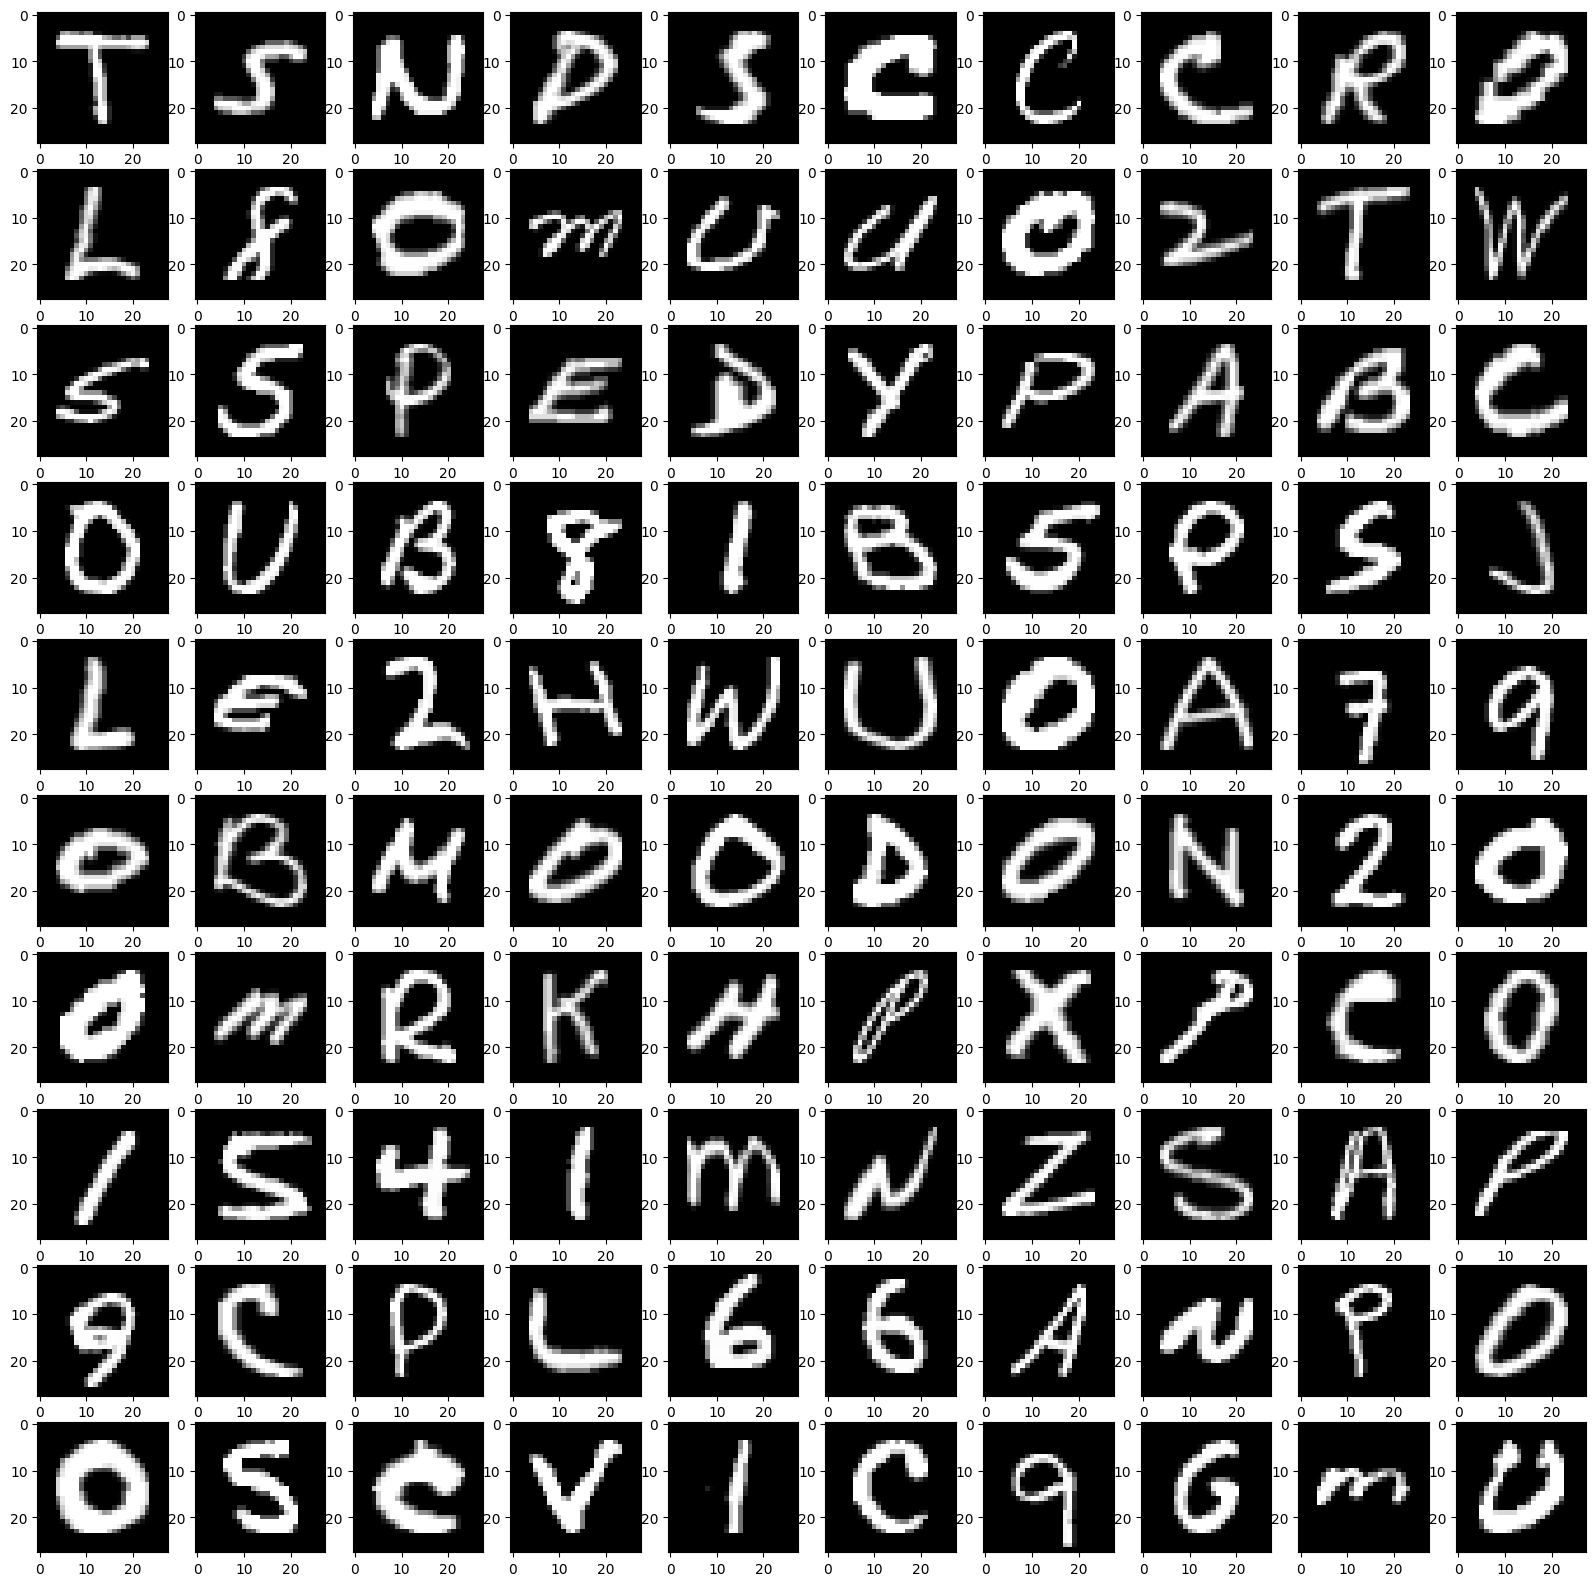

In [ ]:
shuffled_data = shuffle(data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)


In [ ]:

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical

train_data = train_data / 255.0
test_data = test_data / 255.0

# Use to_categorical from tensorflow.keras.utils
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

In [ ]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


In [ ]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1


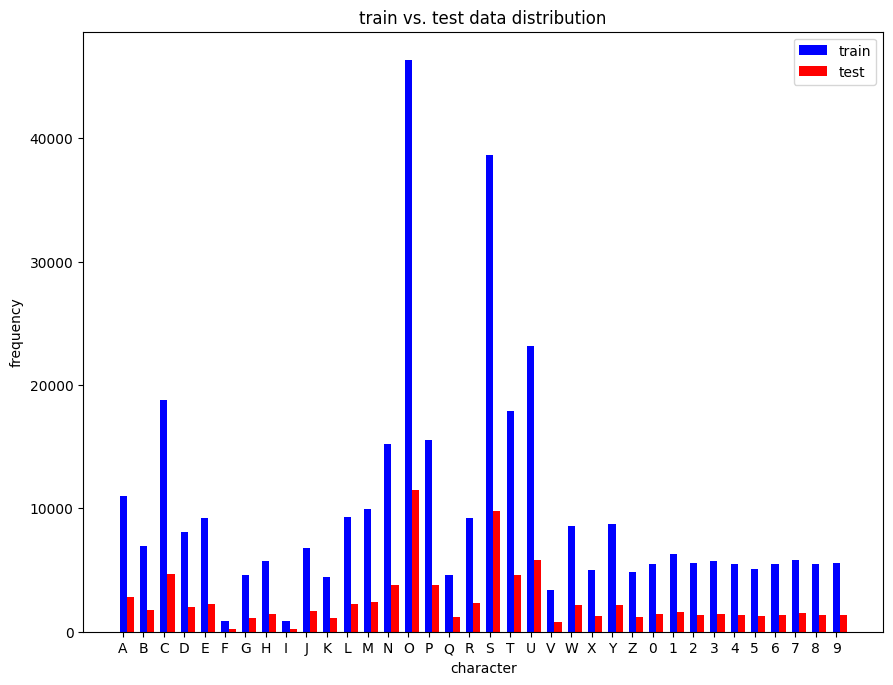

In [ ]:

frequency = [
    train_label_counts, test_label_counts
]

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [ ]:
np.save("../content/numpy/train_data", train_data)
np.save("../content/numpy/train_labels", train_labels)
np.save("../content/numpy/test_data", test_data)
np.save("../content/numpy/test_labels", test_labels)

**CNN Architecture**

In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 18.3 MB/s eta 0:00:00


In [ ]:

import numpy as np
import visualkeras as vk # pip install visualkeras
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [ ]:
train_data = np.load("../content/numpy/train_data/train_data.npy")
test_data = np.load("../content/numpy/test_data/test_data.npy")
train_labels = np.load("../content/numpy/train_labels/train_labels.npy")
test_labels = np.load("/content/numpy/test_labels/test_labels.npy")


In [ ]:

model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Bat  (None, 20, 20, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                        

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


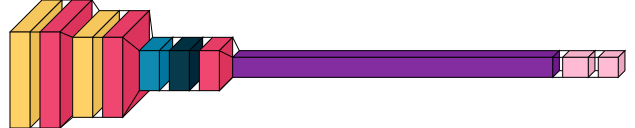

In [ ]:
vk.layered_view(model)

In [ ]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="../content/Untitled Folder/test/models-20240731T142303Z-001/models/best_loss_model.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="../content/Untitled Folder/test/models-20240731T142303Z-001/models/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)



In [ ]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels),
epochs = 10,
batch_size = 200,
callbacks = [best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
 614/1770 [=========>....................] - ETA: 11:35 - loss: 0.4534 - accuracy: 0.8743

KeyboardInterrupt: 

In [ ]:


)
Éléments de sortie d'exécution datant du 15 nov. 2021 03:14
2KB
	Stream
		Epoch 1/10
		1770/1770 [==============================] - 1054s 595ms/step - loss: 0.1620 - accuracy: 0.9536 - val_loss: 0.0830 - val_accuracy: 0.9752
		Epoch 2/10
		1770/1770 [==============================] - 1052s 594ms/step - loss: 0.0724 - accuracy: 0.9781 - val_loss: 0.0646 - val_accuracy: 0.9806
		Epoch 3/10
		1770/1770 [==============================] - 1049s 593ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.0634 - val_accuracy: 0.9811
		Epoch 4/10
		1770/1770 [==============================] - 1043s 589ms/step - loss: 0.0408 - accuracy: 0.9869 - val_loss: 0.0480 - val_accuracy: 0.9859
		Epoch 5/10
		1770/1770 [==============================] - 1043s 589ms/step - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0467 - val_accuracy: 0.9865
		Epoch 6/10
		1770/1770 [==============================] - 1036s 585ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0495 - val_accuracy: 0.9870
		Epoch 7/10
		1770/1770 [==============================] - 1037s 586ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0467 - val_accuracy: 0.9882
		Epoch 8/10
		1770/1770 [==============================] - 1042s 589ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0423 - val_accuracy: 0.9895
		Epoch 9/10
		1770/1770 [==============================] - 1041s 588ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0393 - val_accuracy: 0.9901
		Epoch 10/10
		1770/1770 [==============================] - 1040s 588ms/step - loss: 0.0167 - accuracy: 0.9944 - val_loss: 0.0535 - val_accuracy: 0.9879

Cellule de code <0SjA1Y_ZOXIe>
# %% [code]
plt.plot(history.history["loss"], 'b', label="loss")
plt.plot(history.history["val_loss"], 'r', label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()
Éléments de sortie d'exécution datant du 4 nov. 2021 19:38
16KB
	text/plain
		<Figure size 432x288 with 1 Axes>

Cellule de code <_y-CbwBYPsmi>
# %% [code]
plt.plot(history.history["acc"], 'b', label="acc")
plt.plot(history.history["val_acc"], 'r', label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()
Éléments de sortie d'exécution datant du 4 nov. 2021 19:38
17KB
	text/plain
		<Figure size 432x288 with 1 Axes>

Cellule de code <tBg5K1eCisZ9>
# %% [code]
model.load_weights("../models/best_val_loss_model.h5")

Cellule de code <_aXH_nboRCb->
# %% [code]
loss, acc = model.evaluate(test_data, test_labels)
print(loss, acc)
Éléments de sortie d'exécution datant du 15 nov. 2021 03:11
0KB
	Stream
		2766/2766 [==============================] - 66s 24ms/step - loss: 0.0393 - accuracy: 0.9901
		0.03925527632236481 0.9900892972946167

Cellule de code <m9UNtghKXaPm>
# %% [code]
predictions = model.predict(test_data)

Cellule de code <WN8LMT4rjG4e>
# %% [code]
confusion = confusion_matrix(
    np.argmax(test_labels, axis=1),
    np.argmax(predictions, axis=1)
)
print(confusion)
Éléments de sortie d'exécution datant du 15 nov. 2021 03:13
0KB
	Stream
		[[2764    2    0 ...    0    0    0]
		 [   0 1721    0 ...    0    1    0]
		 [   0    0 4728 ...    0    0    0]
		 ...
		 [   0    0    0 ... 1396    0    1]
		 [   0   10    0 ...    0 1310    1]
		 [   0    0    0 ...    4    2 1362]]

Cellule de code <TWp23jdFVa5U>
# %% [code]
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

df_cm = pd.DataFrame(confusion, columns=np.unique(labels), index = np.unique(labels))
df_cm.index.name = 'actual'
df_cm.columns.name = 'predicted'
plt.figure(figsize = (20,15))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 15}, fmt="d")
Éléments de sortie d'exécution datant du 15 nov. 2021 03:13
149KB
	text/plain
		<matplotlib.axes._subplots.AxesSubplot at 0x7f3199f58690>
		<Figure size 1440x1080 with 2 Axes>

Cellule de code <IvaEbwGUifFE>
# %% [code]



